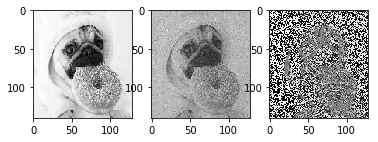

In [29]:
import numpy as np
from scipy.misc import imread
import imageio
import matplotlib.pyplot as plt


def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im).astype('float')
    im2[index] += e[index]
    return im2

def add_saltnpeppar_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im2 = np.copy(im)
    im2[index] = 1-im2[index]
    return im2
   
prop = 0.5
# prop: percentage of images to alter (parameter for both noise mask), prop = 1 --> 100% colour inversion for saltnpeppar noise.
varSigma = 0.1
# varSigma = standard deviation parameter for Gaussian noise, low varSigma --> smoother noise spread.

im = imageio.imread('./figures/grey_pug.jpg')
im = im/255
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap='gray')
im2 = add_gaussian_noise(im,prop,varSigma)
ax2 = fig.add_subplot(132)
ax2.imshow(im2,cmap='gray')
im3 = add_saltnpeppar_noise(im,prop)
ax3 = fig.add_subplot(133)
ax3.imshow(im3,cmap='gray')

# #To use cv2 instead just uncomment the codes below and comment out the codes above using imageio
# import cv2

# im = cv2.imread('./figures/pug.jpg',0)
# im = im/255
# cv2.imshow('greyscale',im)
# cv2.imwrite('greyscale.jpg',im)

# im2 = add_gaussian_noise(im,prop,varSigma)
# gauss_noise = cv2.imshow('gaussian noise',im2)
# cv2.imwrite('gaussian_noise.png', im2)

# im3 = add_saltnpeppar_noise(im,prop)
# snp_noise = cv2.imshow('salt-and-pepper noise', im3)
# cv2.imwrite('snp_noise.png', im3)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


[[0.94117647 0.9372549  0.94117647 ... 0.8745098  0.87843137 0.8745098 ]
 [0.9372549  0.9372549  0.94509804 ... 0.88235294 0.88235294 0.87058824]
 [0.9254902  0.9372549  0.94509804 ... 0.89019608 0.88627451 0.87058824]
 ...
 [0.89803922 0.90196078 0.88627451 ... 0.75294118 0.83921569 0.87058824]
 [0.89019608 0.89411765 0.87843137 ... 0.72156863 0.8        0.85098039]
 [0.88235294 0.88627451 0.8745098  ... 0.70196078 0.76470588 0.82745098]]


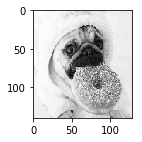

In [26]:
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap='gray')
print(im)

[[0.94117647 0.9372549  0.95532322 ... 0.8745098  0.80357624 0.8745098 ]
 [0.9372549  0.98430254 1.00881825 ... 0.7421234  0.98906539 0.88883211]
 [0.9254902  0.89435865 0.94509804 ... 0.89019608 0.88627451 0.86735905]
 ...
 [0.90630256 0.87919399 0.88627451 ... 0.52910701 0.83921569 0.90796292]
 [0.89019608 0.89411765 1.04081304 ... 0.71430268 0.8        0.66172424]
 [0.98169732 0.88627451 0.79888219 ... 0.68353641 0.75683181 0.82745098]]


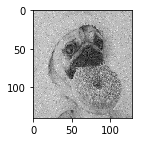

In [27]:
fig = plt.figure()
ax2 = fig.add_subplot(131)
ax2.imshow(im2,cmap='gray')
print(im2)

[[0.94117647 0.9372549  0.94117647 ... 0.1254902  0.12156863 0.8745098 ]
 [0.9372549  0.9372549  0.94509804 ... 0.88235294 0.88235294 0.12941176]
 [0.9254902  0.9372549  0.05490196 ... 0.89019608 0.11372549 0.87058824]
 ...
 [0.10196078 0.09803922 0.88627451 ... 0.75294118 0.16078431 0.87058824]
 [0.10980392 0.89411765 0.12156863 ... 0.27843137 0.2        0.14901961]
 [0.88235294 0.88627451 0.8745098  ... 0.70196078 0.23529412 0.82745098]]


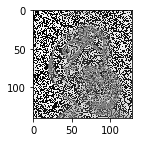

In [28]:
fig = plt.figure()
ax3 = fig.add_subplot(131)
ax3.imshow(im3,cmap='gray')
print(im3)

## Iterative Conditional Modes
We first initialise the latent variables to something, then by fixing all variables except for one and see what is the most likely for this one to be in given that we assume all others to be correct. Below is the result of ICM applied to the original greyscaled image

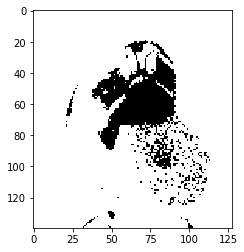

In [34]:
img_gray_arr = np.asarray(im) # convert input into computable array
x = np.rint(img_gray_arr) # round elements of array to nearest integer to determine if pixel is black or white 
img_mean = np.mean(x) 
img_arr = np.copy(x)
img_arr[x<img_mean] = -1 # if below average pixel value set to black
img_arr[x>=img_mean] = 1 # if above average pixel value set to white
'''
To see the exact pixel values for analysis uncommonent the codes below
'''
# print(img_mean)
# print(img_gray_arr)
# print(img_arr)
# print(img_arr[0:10,0:10])
# print(img_arr.shape)
plt.imshow(img_arr, cmap = 'gray')

To compare the results, we'll apply ICM to the noisy images too

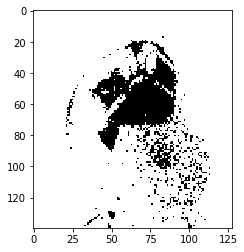

In [36]:
noisy_img_gray_arr = np.asarray(im2)
y = np.rint(noisy_img_gray_arr)
noisy_img_mean = np.mean(y)
noisy_img_arr = np.copy(y)
noisy_img_arr[y<noisy_img_mean] = -1
noisy_img_arr[y>=noisy_img_mean] = 1

plt.imshow(noisy_img_arr, cmap = 'gray')
# print(noisy_img_arr)
# print(type(noisy_img_arr))

In [37]:
def percent_pixel_flipped(noisy_arr,denoised_arr):
    num_flipped = 0
    total_px = noisy_arr.shape[0]*noisy_arr.shape[1]
    for i in range(noisy_arr.shape[0]):
        for j in range(noisy_arr.shape[1]):
            if noisy_arr[i,j]!= denoised_arr[i,j]:
                num_flipped+=1
   
    percent_change = num_flipped*100./total_px
    return percent_change

print (percent_pixel_flipped(noisy_img_arr, img_arr))

2.075892857142857


In [38]:
def check_limit(value, limit):
    if value<0:
        value=limit-1
    if value==limit:
        value=0
    return value

def energyfx(y_array, x_array, xval,yval, constant):
    h = constant[0]
    b = constant[1]
    n = constant[2]
    total_pixels = x_array.shape[0]*x_array.shape[1]
    energy = h * x_array[xval, yval] 
    energy += - n * x_array[xval, yval] * y_array[xval, yval]
    x_neighbour = [-1,1]
    y_neighbour = [-1,1]
    for i in x_neighbour:
        for j in y_neighbour:
            x_n = check_limit(xval +i,x_array.shape[0])
            y_n = check_limit(yval +j, x_array.shape[1])
            
            energy += -b*x_array[xval,yval]*x_array[x_n,y_n]
    energy = energy/total_pixels
    return energy

def calculate_total_energy(y_array,x_array,constant):
    energy = 0.
    for i in range(y_array.shape[0]):
        for j in range(y_array.shape[1]):
            energy += energyfx(y_array, x_array, i,j, constant)
    return energy

#this list is [h, beta,eta]
constant = [0,.1,.02]
hidden_image = np.copy(noisy_img_arr)
total_energy= calculate_total_energy(noisy_img_arr, hidden_image, constant)
print(total_energy)


-0.3574107142857316


In [39]:
def icm_single_pixel(visible_arr, hidden_arr, px_x, px_y, total_energy, const_list):
    current_energy = energyfx(visible_arr, hidden_arr,px_x,px_y, const_list)
    other_energy = total_energy - current_energy
    #flip the pixel
    new_hidden_arr = np.copy(hidden_arr)
    if hidden_arr[px_x,px_y]==1:
        new_hidden_arr[px_x,px_y]=-1
    else:
        new_hidden_arr[px_x,px_y] = 1
    flipped_energy = energyfx(visible_arr, new_hidden_arr,px_x,px_y, const_list)
    #print current_energy, flipped_energy
    if flipped_energy < current_energy:
        should_flip = True
        total_energy = other_energy + flipped_energy
        hidden_arr = new_hidden_arr
        #print percent_pixel_flipped(hidden_arr, visible_arr)
    else:
        should_flip = False
    
    return (hidden_arr,should_flip,total_energy)
    #return (should_flip, hidden_arr, total_energy)

#main icm simulation
hidden_image = np.copy(noisy_img_arr)
energy_this_round = total_energy
print ("% Pixels flipped:", percent_pixel_flipped(hidden_image, img_arr))

for sim_round in range(10):
    for i in range(hidden_image.shape[0]):
        for j in range(hidden_image.shape[1]):
            hidden_image,should_flip,total_energy = icm_single_pixel(noisy_img_arr,hidden_image,i,j, total_energy,constant)
            
        #print percent_pixel_flipped(hidden_image, lena_arr)
    if (total_energy - energy_this_round) == 0:
        print ("Algorithm converged")
        break
    energy_this_round = total_energy
    print ("Total Energy:",total_energy)
    print ("% Pixels flipped:", percent_pixel_flipped(hidden_image, img_arr))

% Pixels flipped: 2.075892857142857
Total Energy: -0.3776830357142918
% Pixels flipped: 3.236607142857143
Total Energy: -0.3791406250000053
% Pixels flipped: 3.4207589285714284
Total Energy: -0.3792834821428624
% Pixels flipped: 3.443080357142857
Total Energy: -0.37936607142857665
% Pixels flipped: 3.4598214285714284
Total Energy: -0.3794062500000052
% Pixels flipped: 3.470982142857143
Total Energy: -0.3794464285714338
% Pixels flipped: 3.482142857142857
Total Energy: -0.3794665178571481
% Pixels flipped: 3.4877232142857144
Algorithm converged


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
3.4877232142857144


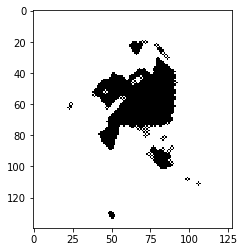

In [40]:
plt.imshow(hidden_image, cmap='gray')
print(hidden_image)
print (percent_pixel_flipped(hidden_image, img_arr))